            Date     Time   Bus  Count OnOff   Latitude  Longitude   Route  \
0     11/13/2019  6:13:47  2403      1   off  35.306957 -80.729568    Gold   
1     11/13/2019  6:15:08  2401      1   off  35.308052 -80.732758   Green   
2     11/13/2019  6:15:14  2401      1    on  35.308052 -80.732758   Green   
3     11/13/2019  6:15:59  2407      1    on  35.308811 -80.725121  Silver   
4     11/13/2019  6:16:59  2407      1    on  35.307224 -80.725296  Silver   
...          ...      ...   ...    ...   ...        ...        ...     ...   
5690  11/14/2019  1:57:58  2411      1   off  35.311626 -80.742447  Silver   
5691  11/14/2019  1:58:47  2410      1   off  35.308788 -80.725128  Silver   
5692  11/14/2019  2:00:15  2410      2   off  35.307198 -80.725182  Silver   
5693  11/14/2019  2:01:20  2411      1    on  35.311081 -80.743011  Silver   
5694  11/14/2019  2:02:46  2411      1   off  35.309357 -80.743980  Silver   

                 Stop      CorrectStop  RunningTotal  
0       

C:\Users\HARRIS~1\AppData\Local\Temp/ipykernel_20864/3636691432.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafor2401.RunningTotal[i] = onBus


<Figure size 720x360 with 0 Axes>

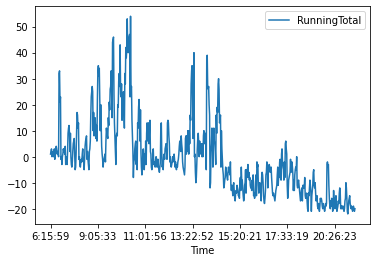

In [52]:
import csv
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from matplotlib.pyplot import figure

file = 'file1Dataframe.csv'

fileDataFrame = pd.read_csv(file, low_memory=False, index_col=0)
fileDataFrame["RunningTotal"] = np.nan
#fileDataframe = fileDataFrame.reindex(columns = fileDataFrame.columns.tolist() + ["RunningTotal"])
fileDataFrame['Time'] = fileDataFrame['Time'].astype(dtype = 'string')

print(fileDataFrame)

print(fileDataFrame.dtypes)

datafor2401 = fileDataFrame.loc[fileDataFrame['Bus'] == 2407]
datafor2401 = datafor2401.reset_index()

print(datafor2401)

onBus = 0
for i in range(0,len(datafor2401)):
    print (i,":",datafor2401.OnOff[i])
    if datafor2401.OnOff[i] == "on":
        onBus = onBus + datafor2401.Count[i]
    else:
        onBus = onBus - datafor2401.Count[i]
    datafor2401.RunningTotal[i] = onBus

print(datafor2401)

f = plot.figure()
f.set_figwidth(10)
f.set_figheight(5)

datafor2401.plot(kind='line', x='Time', y='RunningTotal')



plot.show()

In [ ]:
import csv
import pandas as pd
import numpy as np

In [3]:
file1 = '2019-2020 Stop Data 11-13-2019.csv'
file2 = 'ddfile1.csv'

file1Dataframe = pd.read_csv(file1, low_memory=False)
ddfile1 = pd.read_csv(file2, low_memory=False)


file1Dataframe.dtypes

#file1Dataframe = file1Dataframe.round(4)
#file2Dataframe = file2Dataframe.round(4)

Date          object
Time          object
Bus            int64
Count          int64
On off        object
Latitude     float64
Longitude    float64
Route         object
Stop          object
dtype: object

In [390]:
lat = file1Dataframe.groupby("Stop", as_index = False)["Latitude"].mean()
long = file1Dataframe.groupby("Stop", as_index = False)["Longitude"].mean()
#ddfile1 = file1Dataframe.drop_duplicates('Stop')
#ddfile1 = pd.merge(lat, long, on="Stop", how="left")

file1Dataframe = file1Dataframe.round(5)
#ddfile1 = ddfile1.round(5)

#ddfile1.reset_index()

#ddfile1.to_csv("ddfile1.csv")


file1Dataframe = file1Dataframe.reindex(columns = file1Dataframe.columns.tolist() + ["CorrectStop"])
file1Dataframe.to_csv("file1Dataframe.csv")

#print(ddfile1)
#print(file1Dataframe)

    Unnamed: 0                       Stop  Latitude  Longitude
0            0               Alumni Way E  35.30270  -80.73770
1            1               Alumni Way W  35.30250  -80.73730
2            2        Athletics Complex E  35.30830  -80.73530
3            3        Athletics Complex W  35.30800  -80.73450
4            4          Aux Services East  35.30810  -80.73060
5            5                Belk Hall S  35.31025  -80.73619
6            6                   CRI Deck  35.30940  -80.74410
7            7                Cato Hall N  35.30509  -80.72820
8            8                Cato Hall S  35.30509  -80.72826
9            9             Cone Deck East  35.30431  -80.73505
10          10                Cone Deck W  35.30420  -80.73490
11          11  Duke Centennial Hall East  35.31231  -80.74171
12          12                     EPIC N  35.30940  -80.74010
13          13                     EPIC S  35.30940  -80.74130
14          14                East Deck 2  35.30630  -8

In [4]:
file2 = 'ddfile1.csv'
ddfile1 = pd.read_csv(file2, low_memory=False)
ddfile1 = ddfile1.round(5)

file1Dataframe = file1Dataframe.reindex(columns = file1Dataframe.columns.tolist() + ["CorrectStop"])
file1Dataframe.to_csv("file1Dataframe.csv")


x = np.array([])
y = np.array([])
xy = np.array([])

for i in range(0, len(file1Dataframe)):
    print("i: ", i)
    for j in range(0, len(ddfile1)):
        #print(i, ',', j)
        a = [abs(file1Dataframe.Latitude[i] - ddfile1.Latitude[j])]
        b = [abs(file1Dataframe.Longitude[i] - ddfile1.Longitude[j])]
        a = np.array(a)
        b = np.array(b)
        x = np.append(x, a)
        y = np.append(y, b)
       

    xy = np.add(x, y)
    x = np.array([])
    y = np.array([])
    xy = np.round(xy,5)
    #print(xy)
    minElement = np.amin(xy)
    if(minElement > .01):
        print("                                       minElement ",i,":", minElement)
    result = np.argmin(xy)
    #print(xy)
    #print("index: ", result)

    #print(ddfile1)
    if (file1Dataframe.Stop[i] == "Student Union E") or (file1Dataframe.Stop[i] == "Student Union W"):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Student Union, No Change")
    elif(ddfile1.Stop[result] == "South Village Deck" and file1Dataframe.Route[i] == "Gold"):
        file1Dataframe.CorrectStop[i] = "Hunt Hall"
        print("Hunt Flip")
    elif(ddfile1.Stop[result] == "Hunt Hall" and file1Dataframe.Route[i] == "Green"):
        file1Dataframe.CorrectStop[i] = "South Village Deck"
        print("SOVI Deck Flip")
    elif((file1Dataframe.Stop[i] == "Cone Deck East") or (file1Dataframe.Stop[i] == "Cone Deck W")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Cone Deck, No Change")
        
    elif((file1Dataframe.Stop[i] == "South Village Deck") or (file1Dataframe.Stop[i] == "Hunt Hall")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Hunt/Deck, No Change")
    elif((file1Dataframe.Stop[i] == "Grigg Hall E") or (file1Dataframe.Stop[i] == "Grigg Hall W")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Grigg, No Change")
    elif((file1Dataframe.Stop[i] == "Cato Hall N") or (file1Dataframe.Stop[i] == "Cato Hall S")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Cato, No Change")
    elif((file1Dataframe.Stop[i] == "Robinson Hall S") or (file1Dataframe.Stop[i] == "Robinson Hall N")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Robinson, No Change")
    elif((file1Dataframe.Stop[i] == "Athletics Complex E") or (file1Dataframe.Stop[i] == "Athletics Complex W")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Athletics, No Change")
    elif((file1Dataframe.Stop[i] == "Hickory Hall South") or (file1Dataframe.Stop[i] == "Hickory Hall North")):
        file1Dataframe.CorrectStop[i] = file1Dataframe.Stop[i]
        print("Hickory, No Change")
    else:
        file1Dataframe.CorrectStop[i] = ddfile1.Stop[result]
print("Done Looping")


file1Dataframe.to_csv("file1Dataframe.csv")

i:  0
i:  1
Student Union, No Change
i:  2
Student Union, No Change
i:  3
i:  4
i:  5
Hunt/Deck, No Change
i:  6
i:  7
i:  8
Student Union, No Change
i:  9
i:  10
Cato, No Change
i:  11
i:  12
Student Union, No Change
i:  13
Student Union, No Change
i:  14
Cato, No Change
i:  15
Robinson, No Change
i:  16
Hunt/Deck, No Change
i:  17
Hunt/Deck, No Change
i:  18
i:  19
i:  20
Hunt/Deck, No Change
i:  21
i:  22
i:  23
Student Union, No Change
i:  24
i:  25
i:  26
i:  27
i:  28
i:  29
i:  30
Cato, No Change
i:  31
Student Union, No Change
i:  32
i:  33
Hunt/Deck, No Change
i:  34
i:  35
i:  36
i:  37
i:  38
Cato, No Change
i:  39
i:  40
i:  41
i:  42
Hunt/Deck, No Change
i:  43
Student Union, No Change
i:  44
i:  45
Student Union, No Change
i:  46
i:  47
Student Union, No Change
i:  48
i:  49
i:  50
Hunt/Deck, No Change
i:  51
i:  52
i:  53
i:  54
i:  55
i:  56
i:  57
i:  58
Hunt/Deck, No Change
i:  59
i:  60
Student Union, No Change
i:  61
i:  62
i:  63
i:  64
i:  65
Student Union, No Cha

C:\Users\HARRIS~1\AppData\Local\Temp/ipykernel_20864/1044594862.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1Dataframe.CorrectStop[i] = ddfile1.Stop[result]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


 136
i:  137
i:  138
Hunt/Deck, No Change
i:  139
Student Union, No Change
i:  140
Student Union, No Change
i:  141
i:  142
Cato, No Change
i:  143
Student Union, No Change
i:  144
i:  145
Student Union, No Change
i:  146
i:  147
Hunt/Deck, No Change
i:  148
i:  149
i:  150
Hunt/Deck, No Change
i:  151
Student Union, No Change
i:  152
i:  153
Robinson, No Change
i:  154
i:  155
i:  156
i:  157
i:  158
Cato, No Change
i:  159
i:  160
i:  161
i:  162
i:  163
i:  164
Cone Deck, No Change
i:  165
Robinson, No Change
i:  166
i:  167
i:  168
i:  169
i:  170
i:  171
i:  172
Robinson, No Change
i:  173
i:  174
i:  175
Student Union, No Change
i:  176
i:  177
Cone Deck, No Change
i:  178
i:  179
i:  180
i:  181
i:  182
i:  183
i:  184
i:  185
i:  186
Hunt/Deck, No Change
i:  187
i:  188
i:  189
i:  190
i:  191
i:  192
Student Union, No Change
i:  193
Cato, No Change
i:  194
Student Union, No Change
i:  195
Student Union, No Change
i:  196
i:  197
Student Union, No Change
i:  198
Hunt/Deck, No C

i:  698
i:  699
Student Union, No Change
i:  700
i:  701
i:  702
i:  703
i:  704
Student Union, No Change
i:  705
i:  706
Hunt/Deck, No Change
i:  707
i:  708
Hunt/Deck, No Change
i:  709
i:  710
i:  711
i:  712
i:  713
i:  714
Student Union, No Change
i:  715
Student Union, No Change
i:  716
Student Union, No Change
i:  717
i:  718
Student Union, No Change
i:  719
i:  720
i:  721
i:  722
i:  723
Hunt/Deck, No Change
i:  724
Grigg, No Change
i:  725
Hunt/Deck, No Change
i:  726
Student Union, No Change
i:  727
Student Union, No Change
i:  728
Hunt/Deck, No Change
i:  729
i:  730
i:  731
i:  732
Robinson, No Change
i:  733
Robinson, No Change
i:  734
Student Union, No Change
i:  735
Student Union, No Change
i:  736
i:  737
i:  738
i:  739
i:  740
i:  741
i:  742
i:  743
i:  744
i:  745
Cato, No Change
i:  746
i:  747
i:  748
i:  749
i:  750
i:  751
i:  752
i:  753
i:  754
i:  755
Hunt/Deck, No Change
i:  756
Student Union, No Change
i:  757
Hunt/Deck, No Change
i:  758
i:  759
Grigg, No

i:  1252
i:  1253
i:  1254
i:  1255
i:  1256
i:  1257
i:  1258
i:  1259
i:  1260
i:  1261
i:  1262
i:  1263
i:  1264
i:  1265
i:  1266
i:  1267
i:  1268
i:  1269
Robinson, No Change
i:  1270
i:  1271
Student Union, No Change
i:  1272
Student Union, No Change
i:  1273
i:  1274
Student Union, No Change
i:  1275
i:  1276
i:  1277
i:  1278
i:  1279
i:  1280
i:  1281
i:  1282
i:  1283
i:  1284
i:  1285
i:  1286
i:  1287
i:  1288
i:  1289
i:  1290
i:  1291
i:  1292
i:  1293
Student Union, No Change
i:  1294
i:  1295
i:  1296
Student Union, No Change
i:  1297
i:  1298
i:  1299
i:  1300
i:  1301
Grigg, No Change
i:  1302
i:  1303
i:  1304
i:  1305
Cato, No Change
i:  1306
Cato, No Change
i:  1307
i:  1308
i:  1309
i:  1310
i:  1311
i:  1312
i:  1313
i:  1314
i:  1315
i:  1316
i:  1317
i:  1318
i:  1319
i:  1320
i:  1321
i:  1322
i:  1323
i:  1324
i:  1325
i:  1326
Student Union, No Change
i:  1327
Student Union, No Change
i:  1328
Student Union, No Change
i:  1329
Student Union, No Change
i:  

Robinson, No Change
i:  1797
Robinson, No Change
i:  1798
Student Union, No Change
i:  1799
Student Union, No Change
i:  1800
i:  1801
i:  1802
Robinson, No Change
i:  1803
i:  1804
i:  1805
Robinson, No Change
i:  1806
i:  1807
Student Union, No Change
i:  1808
i:  1809
i:  1810
i:  1811
Cato, No Change
i:  1812
Hickory, No Change
i:  1813
Hunt/Deck, No Change
i:  1814
Robinson, No Change
i:  1815
Hunt/Deck, No Change
i:  1816
i:  1817
i:  1818
i:  1819
i:  1820
i:  1821
i:  1822
i:  1823
Hunt/Deck, No Change
i:  1824
Student Union, No Change
i:  1825
Student Union, No Change
i:  1826
i:  1827
Hunt/Deck, No Change
i:  1828
Robinson, No Change
i:  1829
i:  1830
i:  1831
i:  1832
Robinson, No Change
i:  1833
i:  1834
i:  1835
i:  1836
Grigg, No Change
i:  1837
i:  1838
i:  1839
Cato, No Change
i:  1840
i:  1841
Student Union, No Change
i:  1842
Robinson, No Change
i:  1843
i:  1844
i:  1845
i:  1846
i:  1847
Robinson, No Change
i:  1848
Cato, No Change
i:  1849
i:  1850
i:  1851
i:  185

i:  2359
i:  2360
i:  2361
i:  2362
i:  2363
i:  2364
i:  2365
i:  2366
i:  2367
i:  2368
i:  2369
i:  2370
i:  2371
i:  2372
i:  2373
i:  2374
i:  2375
Robinson, No Change
i:  2376
Cato, No Change
i:  2377
i:  2378
i:  2379
i:  2380
Student Union, No Change
i:  2381
i:  2382
i:  2383
Cato, No Change
i:  2384
Robinson, No Change
i:  2385
Robinson, No Change
i:  2386
Cato, No Change
i:  2387
Cato, No Change
i:  2388
Student Union, No Change
i:  2389
i:  2390
i:  2391
i:  2392
i:  2393
i:  2394
i:  2395
Robinson, No Change
i:  2396
Robinson, No Change
i:  2397
Student Union, No Change
i:  2398
i:  2399
i:  2400
i:  2401
i:  2402
i:  2403
i:  2404
i:  2405
i:  2406
i:  2407
i:  2408
i:  2409
Student Union, No Change
i:  2410
Student Union, No Change
i:  2411
i:  2412
i:  2413
i:  2414
Hunt/Deck, No Change
i:  2415
Hunt/Deck, No Change
i:  2416
Student Union, No Change
i:  2417
Student Union, No Change
i:  2418
Student Union, No Change
i:  2419
i:  2420
i:  2421
i:  2422
Cone Deck, No Chan

i:  2907
Athletics, No Change
i:  2908
i:  2909
i:  2910
i:  2911
i:  2912
i:  2913
Athletics, No Change
i:  2914
Robinson, No Change
i:  2915
Student Union, No Change
i:  2916
i:  2917
i:  2918
i:  2919
i:  2920
i:  2921
Student Union, No Change
i:  2922
Hunt/Deck, No Change
i:  2923
Athletics, No Change
i:  2924
Athletics, No Change
i:  2925
Hunt/Deck, No Change
i:  2926
i:  2927
Grigg, No Change
i:  2928
Student Union, No Change
i:  2929
i:  2930
i:  2931
i:  2932
i:  2933
i:  2934
i:  2935
Student Union, No Change
i:  2936
Hunt/Deck, No Change
i:  2937
Cato, No Change
i:  2938
Cato, No Change
i:  2939
i:  2940
i:  2941
i:  2942
i:  2943
i:  2944
Athletics, No Change
i:  2945
i:  2946
Robinson, No Change
i:  2947
Robinson, No Change
i:  2948
i:  2949
i:  2950
i:  2951
Student Union, No Change
i:  2952
i:  2953
i:  2954
i:  2955
i:  2956
i:  2957
Robinson, No Change
i:  2958
i:  2959
i:  2960
i:  2961
i:  2962
i:  2963
i:  2964
i:  2965
i:  2966
Athletics, No Change
i:  2967
Student 

i:  3474
Grigg, No Change
i:  3475
Grigg, No Change
i:  3476
Hickory, No Change
i:  3477
Cone Deck, No Change
i:  3478
i:  3479
i:  3480
i:  3481
i:  3482
i:  3483
i:  3484
i:  3485
i:  3486
i:  3487
i:  3488
i:  3489
i:  3490
Hunt/Deck, No Change
i:  3491
Athletics, No Change
i:  3492
Hunt/Deck, No Change
i:  3493
i:  3494
Student Union, No Change
i:  3495
i:  3496
i:  3497
Student Union, No Change
i:  3498
i:  3499
i:  3500
i:  3501
i:  3502
i:  3503
i:  3504
i:  3505
i:  3506
i:  3507
i:  3508
i:  3509
Cone Deck, No Change
i:  3510
Student Union, No Change
i:  3511
Student Union, No Change
i:  3512
i:  3513
Student Union, No Change
i:  3514
i:  3515
i:  3516
Cone Deck, No Change
i:  3517
i:  3518
Robinson, No Change
i:  3519
i:  3520
i:  3521
i:  3522
i:  3523
i:  3524
i:  3525
i:  3526
Cato, No Change
i:  3527
Cato, No Change
i:  3528
Cato, No Change
i:  3529
Cato, No Change
i:  3530
i:  3531
Grigg, No Change
i:  3532
i:  3533
i:  3534
Cone Deck, No Change
i:  3535
Cone Deck, No Ch

i:  4017
Grigg, No Change
i:  4018
Hunt Flip
i:  4019
i:  4020
i:  4021
Robinson, No Change
i:  4022
Athletics, No Change
i:  4023
i:  4024
i:  4025
i:  4026
i:  4027
i:  4028
i:  4029
i:  4030
i:  4031
i:  4032
i:  4033
i:  4034
i:  4035
Hunt/Deck, No Change
i:  4036
i:  4037
i:  4038
i:  4039
i:  4040
i:  4041
i:  4042
Hunt/Deck, No Change
i:  4043
Student Union, No Change
i:  4044
Student Union, No Change
i:  4045
i:  4046
i:  4047
Student Union, No Change
i:  4048
Robinson, No Change
i:  4049
Robinson, No Change
i:  4050
i:  4051
Robinson, No Change
i:  4052
Robinson, No Change
i:  4053
Student Union, No Change
i:  4054
i:  4055
i:  4056
i:  4057
i:  4058
i:  4059
i:  4060
i:  4061
Robinson, No Change
i:  4062
Robinson, No Change
i:  4063
i:  4064
i:  4065
i:  4066
Athletics, No Change
i:  4067
i:  4068
i:  4069
Cato, No Change
i:  4070
i:  4071
Cato, No Change
i:  4072
Cato, No Change
i:  4073
i:  4074
i:  4075
i:  4076
i:  4077
Student Union, No Change
i:  4078
Grigg, No Change
i

i:  4578
i:  4579
i:  4580
Hunt/Deck, No Change
i:  4581
Cone Deck, No Change
i:  4582
Hunt/Deck, No Change
i:  4583
i:  4584
i:  4585
Hunt/Deck, No Change
i:  4586
i:  4587
i:  4588
i:  4589
i:  4590
i:  4591
i:  4592
i:  4593
i:  4594
i:  4595
Student Union, No Change
i:  4596
Cone Deck, No Change
i:  4597
Robinson, No Change
i:  4598
Student Union, No Change
i:  4599
i:  4600
Robinson, No Change
i:  4601
Student Union, No Change
i:  4602
Student Union, No Change
i:  4603
i:  4604
i:  4605
i:  4606
i:  4607
Cato, No Change
i:  4608
Cato, No Change
i:  4609
i:  4610
i:  4611
i:  4612
i:  4613
SOVI Deck Flip
i:  4614
i:  4615
i:  4616
i:  4617
i:  4618
i:  4619
Hickory, No Change
i:  4620
Student Union, No Change
i:  4621
Student Union, No Change
i:  4622
i:  4623
i:  4624
i:  4625
i:  4626
i:  4627
i:  4628
i:  4629
i:  4630
i:  4631
i:  4632
i:  4633
i:  4634
i:  4635
Student Union, No Change
i:  4636
Robinson, No Change
i:  4637
Hunt/Deck, No Change
i:  4638
Robinson, No Change
i:  

Hunt/Deck, No Change
i:  5134
Student Union, No Change
i:  5135
Student Union, No Change
i:  5136
i:  5137
i:  5138
i:  5139
i:  5140
i:  5141
Student Union, No Change
i:  5142
Student Union, No Change
i:  5143
i:  5144
Cato, No Change
i:  5145
i:  5146
Student Union, No Change
i:  5147
Student Union, No Change
i:  5148
Student Union, No Change
i:  5149
i:  5150
Student Union, No Change
i:  5151
i:  5152
i:  5153
i:  5154
i:  5155
i:  5156
Student Union, No Change
i:  5157
Hunt/Deck, No Change
i:  5158
i:  5159
i:  5160
i:  5161
i:  5162
Robinson, No Change
i:  5163
i:  5164
i:  5165
i:  5166
Student Union, No Change
i:  5167
i:  5168
i:  5169
i:  5170
Student Union, No Change
i:  5171
Athletics, No Change
i:  5172
i:  5173
i:  5174
i:  5175
i:  5176
Student Union, No Change
i:  5177
i:  5178
Student Union, No Change
i:  5179
Student Union, No Change
i:  5180
Hunt/Deck, No Change
i:  5181
i:  5182
Hunt/Deck, No Change
i:  5183
i:  5184
Student Union, No Change
i:  5185
Student Union, N

In [424]:
temp = file1Dataframe.query("Stop != CorrectStop")
print(temp)
temp.to_csv("changes.csv")

            Date     Time   Bus  Count On off   Latitude  Longitude   Route  \
59    11/13/2019  6:53:49  2402      1    off  35.309925 -80.741852  Silver   
61    11/13/2019  6:53:51  2402      1     on  35.309925 -80.741852  Silver   
70    11/13/2019  6:58:48  2407      1     on  35.309872 -80.741837  Silver   
100   11/13/2019  7:08:08  2409      1     on  35.309917 -80.741875  Silver   
121   11/13/2019  7:15:26  2410      1    off  35.307945 -80.734840  Silver   
...          ...      ...   ...    ...    ...        ...        ...     ...   
5638  11/14/2019  1:07:16  2406      1     on  35.303284 -80.729485   Green   
5640  11/14/2019  1:09:52  2406      1     on  35.307507 -80.729317   Green   
5643  11/14/2019  1:13:10  2406      1    off  35.311607 -80.730453   Green   
5674  11/14/2019  1:39:44  2411      1     on  35.309864 -80.741882  Silver   
5690  11/14/2019  1:57:58  2411      1    off  35.311626 -80.742447  Silver   

              Stop               CorrectStop  
59  

In [ ]:
def mostSimilar(df,look):
    x = np.array([])
    y = np.array([])
    xy = np.array([])

    for i in range(0, len()
        for j in range(0, len(ddfile1)):
            print(i, ',', j)
            a = [abs(file1Dataframe.Latitude[i] - ddfile1.Latitude[j])]
            b = [abs(file1Dataframe.Longitude[i] - ddfile1.Longitude[j])]
            a = np.array(a)
            b = np.array(b)
            x = np.append(x, a)
            y = np.append(y, b)
       

        xy = np.add(x, y)
        x = np.array([])
        y = np.array([])
        xy = np.round(xy,4)
        print(xy)
        minElement = np.amin(xy)
        print("minElement: ", minElement)
        result = np.argmin(xy)
        #print(xy)
        print("index: ", result)
    
        #print(ddfile1)
    
        file1Dataframe.CorrectStop[i] = ddfile1.Stop[result]
        print("Done Looping")


    file1Dataframe.to_csv("file1Dataframe.csv")

In [ ]:
#ddfile1.query('Stop == "CRI Deck"').loc[0, "Latitude"]

In [220]:
print(file1Dataframe.Latitude[100], ',' , file1Dataframe.Longitude[100])
temp = ddfile1[(file1Dataframe.Latitude[100] == ddfile1.Latitude)]
print(temp)
temp = temp[(file1Dataframe.Longitude[100] == temp.Longitude)]
print(temp)

35.3076 , -80.7293
     Stop  Latitude  Longitude
35  Lot 6   35.3076   -80.7224
Empty DataFrame
Columns: [Stop, Latitude, Longitude]
Index: []


In [153]:
for i in range(0, len(file1Dataframe)):
    print(i)
    temp = ddfile1[(file1Dataframe.Latitude[i] == ddfile1.Latitude)]
    temp = temp[(file1Dataframe.Longitude[i] == temp.Longitude)]
    print(temp)
    file1Dataframe.CorrectStop[i] = temp.Stop.item()

print("Done")
file1Dataframe.to_csv("TestingOutput.csv")

0
Empty DataFrame
Columns: [Latitude, Longitude]
Index: []


AttributeError: 'DataFrame' object has no attribute 'Stop'